<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [4]:
df = pd.DataFrame(cancer.data)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


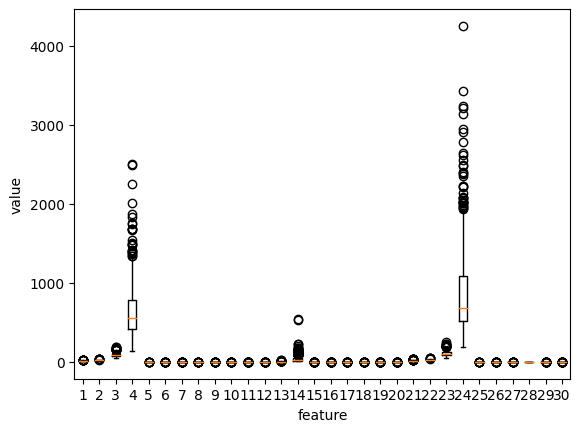

In [8]:
plt.boxplot(df)
plt.xlabel('feature')
plt.ylabel('value')
plt.show() # 확인 결과, 4, 14, 24번째 feature(특성)가 다른 특성보다 값의 분포가 훨씬 큼

In [12]:
cancer.feature_names[[3, 13, 23]] # 모두 넓이와 관련된 특성임을 확인할 수 있음

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [13]:
target = pd.DataFrame(cancer.target)
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
target.describe()

,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [33]:
X = cancer.data
y = cancer.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# 1. stratify=y ~ 클래스 비율을 동일하게 나눔
# 2. test_size=0.2 ~ 8:2로 split
# 3. random_state ~ 무작위로 데이터 셋을 섞은 다음 나눔

In [35]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [36]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [37]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z

  def backprop(self, x, err): # 역전파 계산
    w_grad = x * err # 가중치에 대한 그레이디언트 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

  def activation(self, z): # 로지스틱 회귀의 활성화 함수 = 시그모이드 함수
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복
        z = self.forpass(x_i) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y_i - a) # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    a = self.activation(np.array(z)) # 활성화 함수 적용
    return a > 0.5

In [41]:
neuron = LogisticNeuron()
neuron.fit(X_train, y_train)

<ipython-input-37-10c67070e764>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [42]:
print(neuron.predict(X_test))
print(y_test)

[False  True False False False False  True False False False  True False
  True False False False False  True False  True False False  True  True
  True False False  True  True False  True  True  True  True False  True
  True  True False False  True  True  True False False False  True  True
  True False  True False  True False  True  True  True False False  True
  True  True  True  True False False False  True False  True  True  True
  True False False False  True  True  True False False  True False  True
 False  True  True  True False False  True  True False False False  True
 False  True False False False False  True  True False False  True False
  True False  True False  True  True]
[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


<ipython-input-37-10c67070e764>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [43]:
np.mean(neuron.predict(X_test) == y_test)

<ipython-input-37-10c67070e764>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

In [48]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z

  def backprop(self, x, err): # 역전파 계산
    w_grad = x * err # 가중치에 대한 그레이디언트 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z): # 로지스틱 회귀의 활성화 함수 = 시그모이드 함수
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
        # 클리핑한 후 손실을 누적
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))

      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0.5

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [49]:
layer = SingleLayer()
layer.fit(X_train, y_train)
layer.score(X_test, y_test)

<ipython-input-48-aa146d4b3a87>:21: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9210526315789473

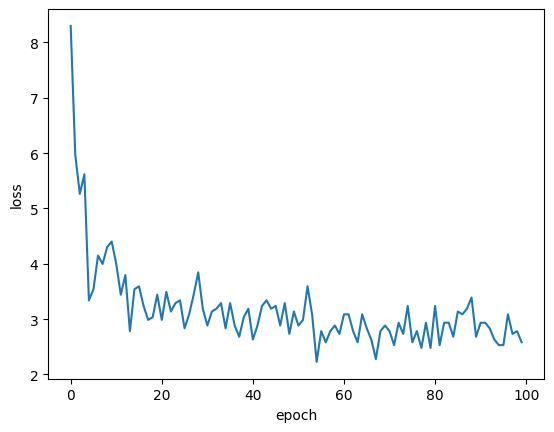

In [50]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [52]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=32)

In [53]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.9210526315789473

In [54]:
sgd.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])